# Google Plystore Data
### Complete EDA Analysis for Beginners to advance EDA with Python

**Author Name:** Danish Azeem\
**Email:** danishazeem365@gmail.com

This data was collected from the following [link](https://www.kaggle.com/datasets/lava18/google-play-store-apps/)

# **About Dataset**
**Context**
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

**Content**
Each app (row) has values for catergory, rating, size, and more.

**Acknowledgements**
This information is scraped from the Google Play Store. This app information would not be available without it.

**Inspiration**
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Danish\AppData\Local\Temp\ipykernel_18320\2405197197.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# 2. Data loading and Exploration | Cleaning


- Let's load the data.

In [2]:
df = pd.read_csv(r'C:\Users\Danish\Desktop\AI and Data Science 6\day_17\googleplaystore.csv')

- Let's have a look on top 5 rows of the data.

In [3]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# set option to be maximum for rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# hide all warnings
import warnings
warnings.filterwarnings("ignore")


In [5]:
print(f"The names of columns in this dataset are : {df.columns}")

The names of columns in this dataset are : Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], dtype='object')


In [6]:
print(f"The dataframe has {df.shape[0]} rows and {df.shape[1]} columns")

The dataframe has 10841 rows and 13 columns


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [8]:
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


# How to make size a numaric columns?

In [9]:
df['Size'].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
26M                    149
16M                    149
25M                    143
20M                    139
21M                    138
10M                    136
24M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.3M                    68
2.5M                    68
2.8M                    65
3.4M                    65
32M                     63
34M                     63
3.7M                    63
3.9M                    62
3.8M                   

In [10]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

---
### observations:
1. "Varies with device"
2. M
3. K
--- 
   

In [11]:
df['Size'].isnull().sum()

0

- No missing values in Size column.

### verify the number of values and 3 different kinds of values

In [12]:
# find values having M in it
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()
# df[df['Size'].str.contains('M')]

8830

In [13]:
# find the values having k in it
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()


316

In [14]:
# find values having 'Varies with device' in them in it
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()


1695

In [15]:
len(df)

10841

In [16]:
8830+1695+316

10841

# convert the whole size column into bytes

# Let's define the function

In [17]:
def convert_size(size):
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', '')) * 1024
        elif 'M' in size:
            return float(size.replace('M', '')) * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
        return size
    
        
 

In [18]:
# let's apply this function
df['Size'] = df['Size'].apply(convert_size)

In [19]:
df['Size'].unique()

array([1.99229440e+07, 1.46800640e+07, 9.12261120e+06, 2.62144000e+07,
       2.93601280e+06, 5.87202560e+06, 3.04087040e+07, 3.46030080e+07,
       3.25058560e+06, 2.93601280e+07, 1.25829120e+07, 2.09715200e+07,
       2.20200960e+07, 3.87973120e+07, 2.83115520e+06, 5.76716800e+06,
       1.78257920e+07, 4.08944640e+07, 3.25058560e+07, 4.40401920e+06,
       7.34003200e+06, 2.41172480e+07, 6.29145600e+06, 6.39631360e+06,
       4.82344960e+06, 9.64689920e+06, 5.45259520e+06, 1.15343360e+07,
       2.51658240e+07,            nan, 9.85661440e+06, 1.57286400e+07,
       1.04857600e+07, 1.25829120e+06, 2.72629760e+07, 8.38860800e+06,
       8.28375040e+06, 5.87202560e+07, 5.97688320e+07, 3.67001600e+07,
       5.66231040e+07, 2.05824000e+05, 3.77487360e+06, 5.97688320e+06,
       9.01775360e+06, 2.51658240e+06, 2.83115520e+07, 2.62144000e+06,
       1.67772160e+07, 3.56515840e+06, 9.33232640e+06, 4.08944640e+06,
       3.04087040e+06, 3.98458880e+07, 3.35544320e+07, 5.66231040e+06,
      

In [20]:
# rename the column
df.rename(columns={'Size': 'File_size(bytes)'}, inplace=True)

In [21]:
df.head()

,App,Category,Rating,Reviews,File_size(bytes),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [22]:
df['File_size(Mb)'] = df['File_size(bytes)'].apply(lambda x: x/(1024*1024))


In [23]:
df['File_size(Kb)'] = df['File_size(bytes)'].apply(lambda x: x/(1024))


In [24]:
df.head()

,App,Category,Rating,Reviews,File_size(bytes),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,File_size(Mb),File_size(Kb)
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,8908.8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,25600.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,2867.2


# Let's take care of installs

In [25]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [26]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [27]:
df['Installs'].isnull().sum()

0

- we have not found any missing values in Installs column.

# installs column

1. remove '+' from the installs column
2. remove ',' from the installs column
3. Convert the installs column into numeric

In [28]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)

In [29]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)

In [30]:
df['Installs'] = df['Installs'].apply(lambda x: int(x))

In [31]:
df.head()

,App,Category,Rating,Reviews,File_size(bytes),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,File_size(Mb),File_size(Kb)
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,8908.8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,25600.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,2867.2


In [32]:
df['Installs'].value_counts() 

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

# Price column

In [33]:
df['Price'].value_counts()

Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$24.99         7
$3.49          7
$7.99          7
$5.49          6
$19.99         6
$11.99         5
$6.49          5
$12.99         5
$8.99          5
$10.00         3
$16.99         3
$1.00          3
$2.00          3
$13.99         2
$8.49          2
$17.99         2
$1.70          2
$3.95          2
$79.99         2
$7.49          2
$9.00          2
$10.99         2
$39.99         2
$33.99         2
$1.96          1
$19.40         1
$4.80          1
$3.28          1
$4.59          1
$15.46         1
$3.04          1
$4.29          1
$2.60          1
$2.59          1
$3.90          1
$154.99        1
$4.60          1
$28.99         1
$2.95          1
$2.90          1
$1.97          1
$200.00        1
$89.99         1
$2.56   

In [34]:
# let's see hoy many values have $
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

800

In [35]:
# This code counts the number of values in the 'Price' column that contain 0 but does not contain $ sighn
df['Price'].loc[(df['Price'].str.contains('0') & ~df['Price'].str.contains('\$'))].value_counts().sum()


10041

In [36]:
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)

In [37]:
df['Price'].value_counts()

Price
0         10041
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
29.99         7
24.99         7
3.49          7
7.99          7
5.49          6
19.99         6
11.99         5
6.49          5
12.99         5
8.99          5
10.00         3
16.99         3
1.00          3
2.00          3
13.99         2
8.49          2
17.99         2
1.70          2
3.95          2
79.99         2
7.49          2
9.00          2
10.99         2
39.99         2
33.99         2
1.96          1
19.40         1
4.80          1
3.28          1
4.59          1
15.46         1
3.04          1
4.29          1
2.60          1
2.59          1
3.90          1
154.99        1
4.60          1
28.99         1
2.95          1
2.90          1
1.97          1
200.00        1
89.99         1
2.56          1
1.20          1
1.26          1
30.99         1
3.

In [38]:
# now we can convert this into a numaric value
df['Price'] = df['Price'].apply(lambda x: float(x))

In [39]:
df.describe()

,Rating,Reviews,File_size(bytes),Installs,Price,File_size(Mb),File_size(Kb)
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141,22030.480308
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679,23130.807322
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301,8.500000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000,5017.600000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000,13312.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000,30720.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000,102400.000000


In [40]:
# using f strings print min, max and average price of the apps
print (f"Min price is {df['Price'].min()}")
print (f"Max price is {df['Price'].max()}")
print (f"Average price is {df['Price'].mean()}")

Min price is 0.0
Max price is 400.0
Average price is 1.0272733142699015


# Missing values

In [41]:
df.isnull().sum().sort_values(ascending=False)


File_size(bytes)    1695
File_size(Mb)       1695
File_size(Kb)       1695
Rating              1474
Current Ver            8
Android Ver            3
Category               1
Type                   1
Genres                 1
App                    0
Reviews                0
Installs               0
Price                  0
Content Rating         0
Last Updated           0
dtype: int64

In [42]:
# find missing values percentage in the data
round(df.isnull().sum().sort_values(ascending=False)/len(df)*100, 2)


File_size(bytes)    15.64
File_size(Mb)       15.64
File_size(Kb)       15.64
Rating              13.60
Current Ver          0.07
Android Ver          0.03
Category             0.01
Type                 0.01
Genres               0.01
App                  0.00
Reviews              0.00
Installs             0.00
Price                0.00
Content Rating       0.00
Last Updated         0.00
dtype: float64

In [43]:
# find total number of missing values
df.isnull().sum().sum()

6573

<Axes: >

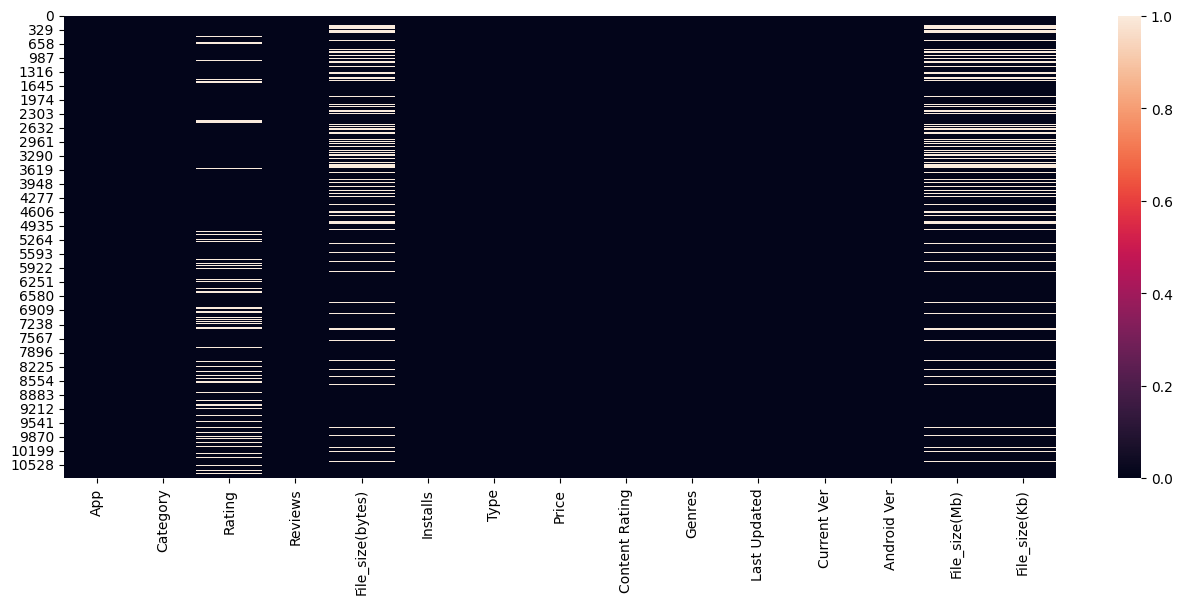

In [44]:
# plot missing values
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull())

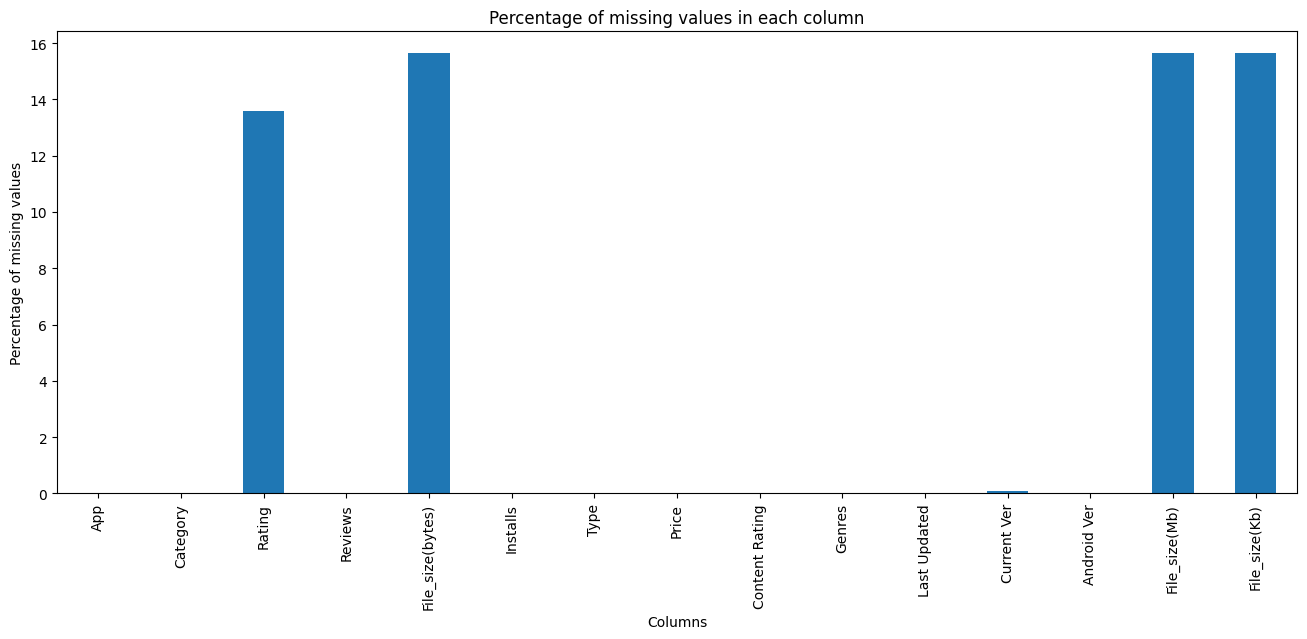

In [45]:
# make figure size
plt.figure (figsize=(16,6)) 
# plotting the null values by their percentage in each column
missing_persontage = df.isnull().sum()/len(df)*100
missing_persontage.plot(kind='bar')
plt.title('Percentage of missing values in each column')
plt.xlabel('Columns')
plt.ylabel('Percentage of missing values')
plt.show()

<Axes: >

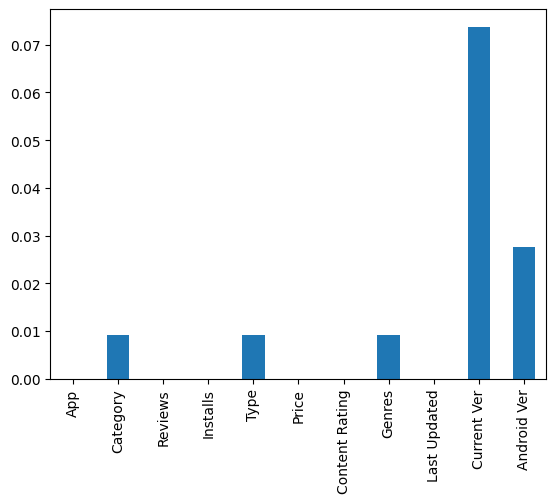

In [46]:
missing_persontage[missing_persontage < 1].plot(kind='bar')